In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io, data
import os
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
import cv2
import math
import random as rd
from PIL import Image as mg

def image_show(image, nrows=1, ncols=1, cmap='gray'): 

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image, cmap='gray',interpolation='nearest')
    return fig, ax
a=np.array([[[1,2]],[[2,3]]])
a=np.squeeze(a)
a

array([[1, 2],
       [2, 3]])

In [21]:
def polygon_area(points):
    area = 0
    q = points[-1]
    for p in points:
        area += p[0] * q[1] - p[1] * q[0]
        q = p
    return int(abs(area / 2))

[[1145, 1889], [1144, 1592], [1144, 1283]]


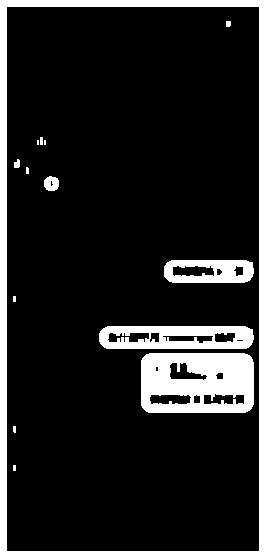

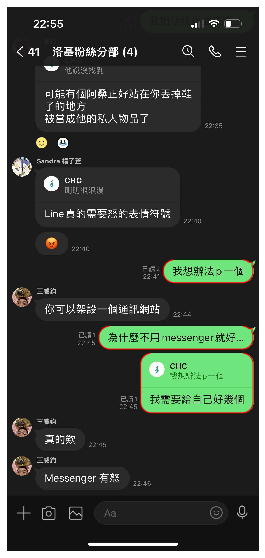

In [62]:
fig_path="317669597_803467624283252_3380170350901295094_n.jpg"
read=cv2.cvtColor(io.imread(fig_path), cv2.COLOR_BGRA2BGR)
h, w, d = read.shape

result=read.copy()

gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
#ret, thresh = cv2.threshold(gray, 150, 255, 0)
#thresh1 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 17, 4)
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)#二值化
# 尋找輪廓
#contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
k = np.ones((int(h/100), int(w/100)), np.uint8)  #3x3捲積核
thresh_open = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, k)      # 開運算[先膨脹-後腐蝕]
image_show(thresh_open)
contours, hierarchy = cv2.findContours(thresh_open, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


cr=['b','-g','-r','-c','-m','-y']
fig, ax = image_show(read)

emoji=[]

for contour in contours:
    c=np.array(contour)
    if len(c)<3:
        continue
    c=np.squeeze(c)
    if polygon_area(c)/(h*w)<1/800:
        continue
    emoji.append([np.max(c[:,0]), np.max(c[:,1])])
    ax.plot(c[:, 0], c[:, 1], cr[2], lw=1)

print(emoji)
emoji=np.array(emoji)


In [71]:
angry=mg.open('angry.png').convert('RGBA')
n=int(w/20)
#y=
angry=angry.resize((n,n))

r,g,b,a= angry.split()
result=mg.open(fig_path)
for p in emoji:
    result.paste(angry, (p[0]-2*n,p[1]-int(n*0.4)),mask=a)

result.save('result/result.png', format=None)

In [85]:
input_path="./input"
output_path='./result'
angry=mg.open('angry.png').convert('RGBA')

for filename in os.listdir(input_path):
    if not (filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg')):
        continue
    fig_path=input_path+'/'+filename
    read=cv2.cvtColor(io.imread(fig_path), cv2.COLOR_BGRA2BGR)
    h, w, d = read.shape
    gray = cv2.cvtColor(read, cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)#二值化
    # 尋找輪廓
    k = np.ones((int(h/100), int(w/100)), np.uint8)  #3x3捲積核
    thresh_open = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, k)      # 開運算[先膨脹-後腐蝕]
    contours, hierarchy = cv2.findContours(thresh_open, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    emoji=[]

    for contour in contours:
        c=np.array(contour)
        if len(c)<3:
            continue
        c=np.squeeze(c)
        if polygon_area(c)/(h*w)<1/800:
            continue
        emoji.append([np.max(c[:,0]), np.max(c[:,1])])
    print(emoji)
    emoji=np.array(emoji)
    
    n=int(w/20)
    angry=angry.resize((n,n))
    r,g,b,a= angry.split()

    result=mg.open(fig_path)
    for p in emoji:
        result.paste(angry, (p[0]-2*n,p[1]-int(n*0.4)),mask=a)

    result.save(output_path+'/'+filename, format=None)

[[1145, 1889], [1144, 1592], [1144, 1283]]


In [59]:
cc=np.array([[1,2],[2,3]])
np.max(cc[:,0])

2